# PSO e Random Walkna na busca por palavras alvo
Por: Ábner Pereira

# Índice
- [Segundo caso de teste](#scrollTo=U2HliHkUmg5R)
   - [Função objetivo](#scrollTo=cnNVPDFliuQz)
   - [Equação](#scrollTo=7FAw27QaiuQ0)
   - [Funções](#scrollTo=E-91koMQmg5T)
   - [Execução](#scrollTo=FoGV4YIQqngS)
   - [Visualização](#scrollTo=dFoWZpfaGijG)
- [PSO](#scrollTo=96WTM2YgKa7H)

# Segundo caso de teste

Neste segundo caso de teste ainda usando um Random Walk buscaremos o mínimo da [função objetivo](#scrollTo=cnNVPDFliuQz), dada uma palavra representada por 30 números, usando uma distribuição uniforme para gerar uma população de 30 sequências de números reais variando de 0 a 1, convertidos respectivamente segundo as faixas maior e menor valor da palavra procurada, sob a [Equação](#scrollTo=7FAw27QaiuQ0) abaixo.

### Função objetivo

In [ ]:
from IPython.display import display, Math, Latex
display(Math(r'\frac{\sum \limits_{i=1}^{n} \sqrt{y_i - x_i}}{2}'))

<IPython.core.display.Math object>

### Equação

In [ ]:
display(Math(r"x_i'= LB_{x_i} + (UB{x_i} - LB{x_i}) \times valor_i"))

<IPython.core.display.Math object>

### Funções

In [ ]:
import pandas as pd
def populacao_a(x_inf, x_sup, qtd_seqs, qtd_valores):
  #valores a aleatórios
  populacao = np.random.uniform(x_inf,x_sup,(qtd_seqs,qtd_valores))
  return populacao

In [ ]:
def populacao_n(qtd_seqs, qtd_valores, populacao):
  lb = min(alvo)
  ub = max(alvo)
  #conversão nas faixas
  i = 0
  for i in range(qtd_seqs):
    j = 0
    for j in range(qtd_valores):
      # equação 1 em cada valor
      populacao[i][j] = lb + (ub - lb) * populacao[i][j]
      j += 1
    i += 1
  return populacao

In [ ]:
def funcao_obj(palavra):
  y = 0
  y = (sum([(alvo[i] - palavra[i])**2 for i in range(len(alvo))]))**0.5
  return y

In [ ]:
def resultado(qtd_seqs, qtd_valores, populacao):
  i = 0
  x = []
  y = []
  for i in range(qtd_seqs):
    j = 0
    for j in range(qtd_valores):
      x.append(populacao[i][j])
      j += 1
    y.append(funcao_obj(x))
    i += 1
  return y

### Parâmetros

In [ ]:
import pandas as pd

#Entrada
alvo = [52.547,72.154,53.694,57.771,115.88,105.59,75.368,126.02,52.756,85.100,
        80.525,111.24,113.62,64.95,89.181,85.647,101.71,106.75,110.37,72.082,
        104.38,102.41,63.009,59.52,89.869,126.78,77.231,96.821,67.905,110.1]
x_inf = 0
x_sup = 1
qtd_seqs = 100
qtd_valores = 30
qtd_geracoes = 5000
qtd_execucoes = 20

df_populacao = pd.DataFrame(None) #melhores indivíduos por geração
df_fitness =  pd.DataFrame(None) #melhor fitness por geração
df_solucoes = pd.DataFrame(None) #melhores resultados por execução do algoritmo
df_dispersao =  pd.DataFrame(None, columns=["mean", "std"]) #valores por  execução do algoritmo

### Execução

In [ ]:
import numpy as np

In [ ]:
i = 0
for i in range(qtd_execucoes):
  j = 0
  for j in range(qtd_geracoes):
    #Criando população com indivíduos aleatórios com valores entre X_INF e X_SUP convertendo-os às faixas
    if j == 0:
      populacao_final = populacao_n(qtd_seqs, qtd_valores, populacao_a(x_inf, x_sup, qtd_seqs, qtd_valores))
    else:
      populacao_final = []
      populacao_final = populacao_n(meio, qtd_valores, populacao_a(x_inf, x_sup, meio, qtd_valores))

    #Gerando resultado para cada indivíduo
    if j == 0:
      valores_r = []
      valores_r = resultado(qtd_seqs, qtd_valores, populacao_final)
    else:
      valores_r = []
      valores_r = resultado(meio, qtd_valores, populacao_final)
    
    #Guardando novos resultados no Data Frame
    df_pf = pd.DataFrame(populacao_final)
    df_pf["y"] = valores_r
    df_populacao = pd.concat([df_populacao, df_pf])
    
    #Ordenando indivíduos/resultados
    df_populacao.sort_values(by=["y"], inplace=True)
    df_populacao.reset_index(drop=True, inplace=True)
    
    #Guardando melhor fitness da geração
    df_fitness = df_fitness.append(df_populacao.iloc[[0]], ignore_index=True)

    #Excluindo 50% piores indivíduos
    meio = int(len(df_populacao)/2)
    df_populacao.drop(df_populacao[df_populacao.index >= meio].index, inplace=True)
    df_populacao.reset_index(drop=True, inplace=True)

    j += 1
    
  #Guardando melhor resultado de cada execucao
  df_solucoes = df_solucoes.append(df_populacao.iloc[[0]], ignore_index=True)

  #Calculando a média e desvio padrão entre os melhores fitness da execução
  df_dispersao = df_dispersao.append(df_fitness["y"].describe().loc[["mean", "std"]], ignore_index=True)

  i+=1

### Visualização

**Melhores resultados por geração**

In [ ]:
df_fitness

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,y
0,54.164490,116.241455,65.820832,115.972027,111.672237,82.373728,108.339232,68.611945,102.117047,90.336505,96.649148,93.649820,79.563522,75.141241,116.486563,95.832968,66.444516,80.816107,74.920950,105.916990,118.582586,109.331440,75.333685,101.878251,112.637216,119.576559,81.519634,52.904917,68.279885,74.236251,160.884005
1,64.126219,111.296044,92.915800,94.338589,115.051427,64.371124,87.615388,104.729807,98.173487,122.727980,76.608427,91.314660,70.905688,95.432277,122.309432,64.813940,68.425641,111.714893,101.400942,99.617731,114.809311,75.457163,62.451538,114.283139,93.537159,116.273018,113.463594,58.270281,102.303889,111.805799,157.686944
2,64.126219,111.296044,92.915800,94.338589,115.051427,64.371124,87.615388,104.729807,98.173487,122.727980,76.608427,91.314660,70.905688,95.432277,122.309432,64.813940,68.425641,111.714893,101.400942,99.617731,114.809311,75.457163,62.451538,114.283139,93.537159,116.273018,113.463594,58.270281,102.303889,111.805799,157.686944
3,64.126219,111.296044,92.915800,94.338589,115.051427,64.371124,87.615388,104.729807,98.173487,122.727980,76.608427,91.314660,70.905688,95.432277,122.309432,64.813940,68.425641,111.714893,101.400942,99.617731,114.809311,75.457163,62.451538,114.283139,93.537159,116.273018,113.463594,58.270281,102.303889,111.805799,157.686944
4,62.448224,69.164318,124.629209,123.169847,92.139199,113.521561,74.369494,58.303112,68.798670,92.852528,88.352285,90.378152,121.963041,99.168013,77.213487,80.601591,121.305958,115.852161,63.520479,65.447522,67.859815,58.279852,56.366743,65.378704,89.777184,56.933072,118.499051,92.265220,83.135812,67.589301,143.225423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,112.265957,118.199220,67.576741,92.623839,74.961337,75.280243,63.720329,123.844587,117.332132,95.963672,92.614708,123.404693,117.508045,90.631157,67.716889,71.243744,99.891132,54.458053,91.338010,83.072711,123.401619,53.230548,72.558922,93.672213,120.975094,92.871171,78.731469,86.978848,86.169400,65.271631,90.869915
99996,112.265957,118.199220,67.576741,92.623839,74.961337,75.280243,63.720329,123.844587,117.332132,95.963672,92.614708,123.404693,117.508045,90.631157,67.716889,71.243744,99.891132,54.458053,91.338010,83.072711,123.401619,53.230548,72.558922,93.672213,120.975094,92.871171,78.731469,86.978848,86.169400,65.271631,90.869915
99997,112.265957,118.199220,67.576741,92.623839,74.961337,75.280243,63.720329,123.844587,117.332132,95.963672,92.614708,123.404693,117.508045,90.631157,67.716889,71.243744,99.891132,54.458053,91.338010,83.072711,123.401619,53.230548,72.558922,93.672213,120.975094,92.871171,78.731469,86.978848,86.169400,65.271631,90.869915
99998,112.265957,118.199220,67.576741,92.623839,74.961337,75.280243,63.720329,123.844587,117.332132,95.963672,92.614708,123.404693,117.508045,90.631157,67.716889,71.243744,99.891132,54.458053,91.338010,83.072711,123.401619,53.230548,72.558922,93.672213,120.975094,92.871171,78.731469,86.978848,86.169400,65.271631,90.869915


**Melhores resultados por execução**

In [ ]:
df_solucoes

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,y
0,60.990112,120.561731,68.266793,104.491038,118.177875,83.753158,120.105376,84.252058,84.765534,77.300322,70.400030,126.758449,92.329704,124.479642,81.886379,65.882105,123.224300,89.417951,58.393893,108.700185,70.633469,65.940469,56.201359,125.080785,103.271958,122.524287,126.296706,75.528240,72.705395,125.858895,105.615158
1,60.990112,120.561731,68.266793,104.491038,118.177875,83.753158,120.105376,84.252058,84.765534,77.300322,70.400030,126.758449,92.329704,124.479642,81.886379,65.882105,123.224300,89.417951,58.393893,108.700185,70.633469,65.940469,56.201359,125.080785,103.271958,122.524287,126.296706,75.528240,72.705395,125.858895,105.615158
2,60.990112,120.561731,68.266793,104.491038,118.177875,83.753158,120.105376,84.252058,84.765534,77.300322,70.400030,126.758449,92.329704,124.479642,81.886379,65.882105,123.224300,89.417951,58.393893,108.700185,70.633469,65.940469,56.201359,125.080785,103.271958,122.524287,126.296706,75.528240,72.705395,125.858895,105.615158
3,67.587607,77.341731,66.791897,80.955973,72.279978,94.344584,58.379205,113.908708,102.897539,92.256547,72.488509,108.089847,83.785405,121.084650,78.029557,61.739742,71.736929,68.760098,75.169868,55.275456,74.791205,94.562821,115.674012,109.184590,97.273629,77.823954,91.302676,90.782411,84.924698,92.614094,101.034386
4,67.587607,77.341731,66.791897,80.955973,72.279978,94.344584,58.379205,113.908708,102.897539,92.256547,72.488509,108.089847,83.785405,121.084650,78.029557,61.739742,71.736929,68.760098,75.169868,55.275456,74.791205,94.562821,115.674012,109.184590,97.273629,77.823954,91.302676,90.782411,84.924698,92.614094,101.034386
5,67.587607,77.341731,66.791897,80.955973,72.279978,94.344584,58.379205,113.908708,102.897539,92.256547,72.488509,108.089847,83.785405,121.084650,78.029557,61.739742,71.736929,68.760098,75.169868,55.275456,74.791205,94.562821,115.674012,109.184590,97.273629,77.823954,91.302676,90.782411,84.924698,92.614094,101.034386
6,96.721548,69.577709,80.357711,107.167147,118.101155,56.699465,95.396795,115.469055,125.060469,113.204904,80.454646,107.721313,93.720508,55.650547,109.948935,69.622273,105.382071,104.754105,93.587166,102.097485,58.579718,72.471932,80.014184,63.820944,123.509928,67.701600,56.499564,60.824800,99.970538,92.174637,99.656334
7,96.721548,69.577709,80.357711,107.167147,118.101155,56.699465,95.396795,115.469055,125.060469,113.204904,80.454646,107.721313,93.720508,55.650547,109.948935,69.622273,105.382071,104.754105,93.587166,102.097485,58.579718,72.471932,80.014184,63.820944,123.509928,67.701600,56.499564,60.824800,99.970538,92.174637,99.656334
8,96.721548,69.577709,80.357711,107.167147,118.101155,56.699465,95.396795,115.469055,125.060469,113.204904,80.454646,107.721313,93.720508,55.650547,109.948935,69.622273,105.382071,104.754105,93.587166,102.097485,58.579718,72.471932,80.014184,63.820944,123.509928,67.701600,56.499564,60.824800,99.970538,92.174637,99.656334
9,105.337268,97.493262,118.728520,64.862596,95.885217,99.737100,76.738063,63.964489,81.733123,122.572993,83.638127,119.671318,119.942085,107.242306,107.656050,71.380394,77.005404,115.652731,119.485353,123.346254,56.897877,82.117181,108.774445,109.957351,106.897515,83.118946,96.848565,72.029212,92.469668,76.147152,95.176848


**Média e desvio padrão dos fitness por execução**

In [ ]:
df_dispersao

,mean,std
0,108.010594,7.047677
1,106.812876,5.125140
2,106.413636,4.222511
3,105.917183,3.888283
4,104.940623,3.988697
5,104.289584,3.921394
6,103.695373,3.919221
7,103.190493,3.901868
8,102.797809,3.842728
9,102.088571,4.245700


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sbn

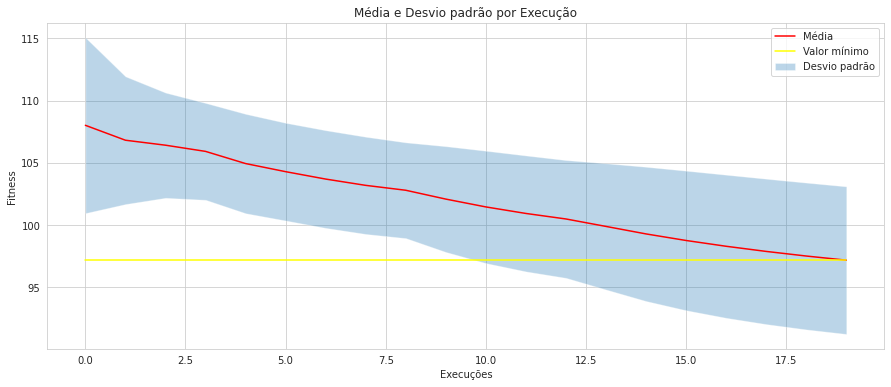

In [ ]:
sbn.set_style("whitegrid")
plt.figure(figsize=(15,6))
plt.plot(df_dispersao.index, df_dispersao["mean"], label='Média', color="red")
plt.fill_between(range(len(df_dispersao)), df_dispersao["mean"]-df_dispersao["std"], df_dispersao["mean"]+df_dispersao["std"], alpha=0.3, label='Desvio padrão')
plt.plot(df_dispersao.index, [min(df_dispersao["mean"]) for i in range(len(df_dispersao.index))], label="Valor mínimo", color="yellow")
plt.xlabel('Execuções')
plt.ylabel('Fitness')
plt.title("Média e Desvio padrão por Execução")
plt.legend()
plt.show()

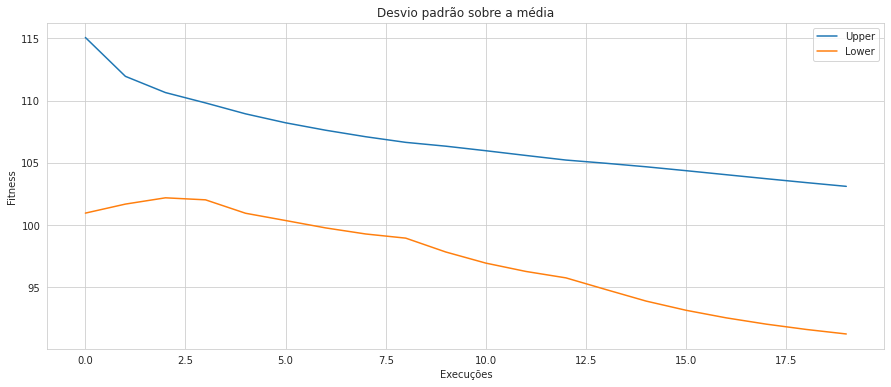

In [ ]:
sbn.set_style("whitegrid")
plt.figure(figsize=(15,6))
plt.plot(df_dispersao.index, df_dispersao["mean"] + df_dispersao["std"], label='Upper')
plt.plot(df_dispersao.index, df_dispersao["mean"] - df_dispersao["std"], label='Lower')
plt.xlabel('Execuções')
plt.ylabel('Fitness')
plt.title("Desvio padrão sobre a média")
plt.legend()
plt.show()

> <p align="justify">Através dos resultados apresentados podemos observar que a população aparentemente parece está convergindo à solução ótima (se pensarmos em minimização) neste algoritmo, quando vemos que a média continua se aproximando de zero, isso se torna custoso um vez que ele diminui o rítmo ainda bastante longe da solução ótima, nos deixa a impressão de que por se tratar apenas de randomização de valores o algoritmo possui bastante dificuldade para minizar por se tratar de um cenário um pouco mais complexo com muitos valores a serem aproximadados.<br>
Podemos ainda visualizar através do gráficos acima que o desvio padrão (máximo e mínimo) calculado sobre os melhores resultados selecionados um entre todas as populações por execução se aproxima cada vez mais da curva que representa a média sobre os mesmos resultados selecionados, porém ainda apresenta um valor elevado em comparação à média, nos deixando com uma baixa confiabilidade no algoritmo.</p>

# PSO

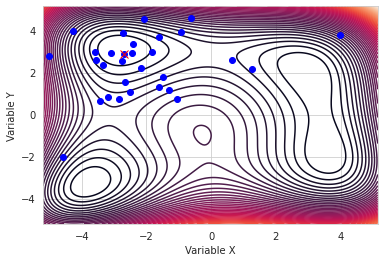

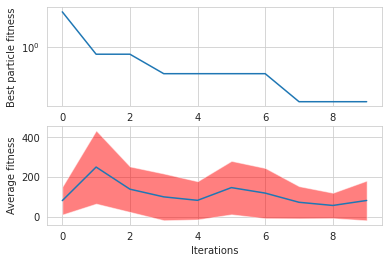

Best result found
X: [-2.8676, 3.0988]
FITX: 1.7373e-01


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd

NPARTICLE = 30
DIM = 2
RANGE = (-5, 5)
NITERATION = 10
VMAX = (RANGE[1] - RANGE[0]) / 2.0

C1 = 2.05
C2 = 2.05
WRANGE = (.4, .9)
W = [WRANGE[1] - (WRANGE[1] - WRANGE[0]) * i / NITERATION for i in range(NITERATION)]

class Particle:
    
    # contructor
    def __init__(self, f, n = None, x = None):
        if n is not None:
            self.n = n
        else:
            self.n = DIM
            
        # store objective function
        self.f = f
        
        # start position at random
        if x is not None:
            self.x = x * np.ones(self.n) # change to array-like
        else:               
            self.x = RANGE[0] + (RANGE[1] - RANGE[0]) * np.random.random(self.n)
            
        # evaluate position
        self.evaluate()

        # start velocity with 0
        self.v = np.zeros(self.n)

        # deep copy the current position as best personal and fitness
        self.m = copy.deepcopy(self.x)
        self.fit_m = self.fit_x
        
    def __str__(self):
        return "X: " + str([round(i, 4) for i in self.x]) + \
               "\nFITX: " + str("{:.4e}".format(self.fit_x))
#               "\nM: " + str([round(i, 4) for i in self.m]) + \
#               "\nFITM: " + str("{:.4e}".format(self.fit_m)) + \
#               "\nV: " + str([round(i, 4) for i in self.v])
               
    def getCopy(self):
        return copy.deepcopy(self)
    
    def evaluate(self):
        self.fit_x = self.f(self.x)

class Swarm:
       
    def __init__(self, f, n = None):
        if n is not None:
            self.n = n
        else:
            self.n = NPARTICLE
        
        self.f = f
        self.particles = []
        
    def initialize(self):
        for i in range(self.n):
            self.particles.insert(i, Particle(self.f))
    
    def avgFitness(self):
        return sum(p.fit_x for p in self.particles) / float(self.n)
    
    def stdFitness(self, avg = None):
        if avg is None:
            avg = self.avgFitness()
        return math.sqrt(sum((p.fit_x - avg)**2 for p in self.particles) / float(self.n - 1))
            
        
    def printFitness(self):
        print(["{:.4e}".format(p.fit_x) for p in self.particles])

# Objective functions to be optimized
from math import cos, pi

def sphere(x):
    return sum(i * i for i in x)

def rastrigin(x):
    return 10 * len(x) + sum(i * i - 10 * cos(2 * pi * i) for i in x)

def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2


"""   Declarations and definitions of PSO functions   """
# Update the velocity of a particle
def updateVelocity(i, p, g):
    r1 = np.random.random(DIM)
    r2 = np.random.random(DIM)
    p.v = W[i] * p.v + \
          C1 * r1 * (p.m - p.x) + \
          C2 * r2 * (g.x - p.x)
    for i in range(DIM):
        if(np.abs(p.v[i]) > VMAX):
            p.v[i] = np.sign(p.v[i]) * VMAX        
    
# Move a particle in the search space
def move(p):
    p.x = p.x + p.v
    for i in range(DIM):
        if(p.x[i] < RANGE[0]):
            p.x[i] = RANGE[0]
        if(p.x[i] > RANGE[1]):
            p.x[i] = RANGE[1]

# Evaluate a particle
def evaluate(p):
    p.evaluate()
    
# Update local and global best memories
def updatePBAndGB(p, g):
    if(p.fit_x <= p.fit_m):
        p.m = copy.deepcopy(p.x)
        p.fit_m = p.fit_x
        if(p.fit_x <= g.fit_x):
            g.x = copy.deepcopy(p.x)
            g.fit_x = p.fit_x
            
# Find the best particle from the swarm
def getGlobalBest(swarm):
    fits = [p.fit_x for p in swarm.particles]
    i = fits.index(min(fits))
    return swarm.particles[i].getCopy()

"""   Main iteration of the algorithm   """
f = himmelblau
swarm = Swarm(f, NPARTICLE)
swarm.initialize()
g = getGlobalBest(swarm)
avg = np.zeros(NITERATION)
std = np.zeros(NITERATION)
bfit = np.zeros(NITERATION)

# plot the level curves
r = np.arange(RANGE[0]-.2, RANGE[1]+.2, 0.05)
x, y = np.meshgrid(r, r)
z = copy.deepcopy(x) # temporarily
for i in range(x.shape[0]):
    z[i, :] = [f([x[i, j], y[i, j]]) for j in range(x.shape[1])]
    
fig, ax = plt.subplots()
ax.contour(x, y, z, 60)
plt.xlabel("Variable X")
plt.ylabel("Variable Y")

# plot the swarm and the global best particle
pos = np.matrix([[swarm.particles[j].x[0], swarm.particles[j].x[1]] for j in range(NPARTICLE)])
h = ax.plot(pos[:, 0], pos[:, 1], 'ob') # swarm
hg = ax.plot(g.x[0], g.x[1], 'xr', markersize = 8) # global best

for i in range(NITERATION):
    #plt.title("Iteration: " + str(i+1))
    for j in range(NPARTICLE):
        updateVelocity(i, swarm.particles[j], g)
        move(swarm.particles[j])
        evaluate(swarm.particles[j])
        updatePBAndGB(swarm.particles[j], g)
    avg[i] = swarm.avgFitness()
    std[i] = swarm.stdFitness(avg[i])
    bfit[i] = g.fit_x
    # remove swarm and global best
    h[0].remove()
    hg[0].remove()
    #plot again swarm and global best
    pos = np.matrix([[swarm.particles[j].x[0], swarm.particles[j].x[1]] for j in range(NPARTICLE)])
    h = ax.plot(pos[:, 0], pos[:, 1], 'ob')
    hg = ax.plot(g.x[0], g.x[1], 'xr', markersize = 8)
    plt.pause(.005)

"""   Results and plots   """
t = range(NITERATION)
plt.figure(2)

# Plot best particle through iterations
plt.subplot(211)
plt.plot(t, bfit)
plt.yscale('log')
plt.grid(True)
plt.xlabel("Iterations")
plt.ylabel("Best particle fitness")

# Plot average fitness through iterations
plt.subplot(212)
plt.plot(t, avg)
plt.fill_between(t, avg+std, avg-std, facecolor='red', alpha=0.5)
plt.grid(True)
plt.xlabel("Iterations")
plt.ylabel("Average fitness")

plt.show()

print("Best result found")        
print(g)